# Deep Learning en imágenes

** **

## **Costa Rica Big Data School 2020**

### PAttern Recognition and MAchine Learning Group (PARMA)


** **

## **Contacto**

Érick Alejandro Muñoz Alvarado. \\
Correo: erickm968@gmail.com \\
Telegram: [@Erickm03](https://t.me/Erickm03) \\
ResearchGate: [Érick Alejandro Muñoz Alvarado](https://www.researchgate.net/profile/Erick_Munoz_Alvarado) \\
Github: [eralmual](https://github.com/eralmual)

# Bibliotecas por utilizar 

In [1]:
import torch


import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torch.autograd import Variable
import torchvision.transforms as transforms
%matplotlib inline


from PIL import Image
from torchvision import transforms

# Buscamos GPU y de lo contrario utilizamos CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Imágenes

## ¿Qué es una imagen?


*   Representación visual de algo.
*   Representación de ideas o conceptos.



## ¿Cómo representamos imágenes a un computador?


![Text](https://computerscience.chemeketa.edu/cs160Reader/_images/face.png)

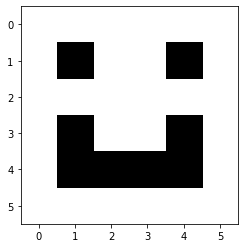

In [2]:
# Creamos nuestra imagen
smiley_bw_float= np.array([[1, 1, 1, 1, 1, 1],
                      [1, 0, 1, 1, 0, 1],
                      [1, 1, 1, 1, 1, 1],
                      [1, 0, 1, 1, 0, 1],
                      [1, 0, 0, 0, 0, 1],
                      [1, 1, 1, 1, 1, 1]], dtype=np.float32)

smiley_bw_int = np.array([[255, 255, 255, 255, 255, 255],
                          [255, 0,   255, 255, 0,   255],
                          [255, 255, 255, 255, 255, 255],
                          [255, 0,   255, 255, 0,   255],
                          [255, 0,   0,   0,   0,   255],
                          [255, 255, 255, 255, 255, 255]], dtype=np.uint8)

# Mostramos la imagen 
#plt.imshow(smiley_bw_float, cmap='gray')
plt.imshow(smiley_bw_int, cmap='gray')

## ¿Cómo representamos imágenes a color?

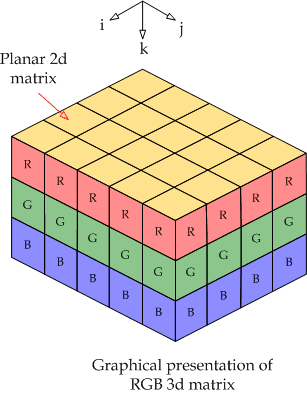

(6, 6, 3)


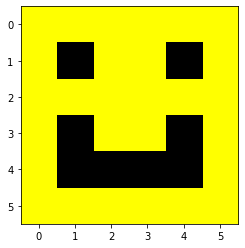

In [3]:
# Creamos canal R
smiley_r = np.array([[1, 1, 1, 1, 1, 1],
                     [1, 0, 1, 1, 0, 1],
                     [1, 1, 1, 1, 1, 1],
                     [1, 0, 1, 1, 0, 1],
                     [1, 0, 0, 0, 0, 1],
                     [1, 1, 1, 1, 1, 1]], dtype=np.float32)

# Creamos canal G
smiley_g = np.array([[1, 1, 1, 1, 1, 1],
                     [1, 0, 1, 1, 0, 1],
                     [1, 1, 1, 1, 1, 1],
                     [1, 0, 1, 1, 0, 1],
                     [1, 0, 0, 0, 0, 1],
                     [1, 1, 1, 1, 1, 1]], dtype=np.float32)

# Creamos canal B
smiley_b = np.array([[0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0]], dtype=np.float32)

# Construimos la imagen 
smiley_color = np.array([smiley_r, smiley_g, smiley_b])
# Reordenamos la imagen para que matplotlib la pueda dibujar
smiley_color = np.transpose(smiley_color, (1, 2, 0))
# Vemos la forma de la imagen
print(smiley_color.shape)

# Mostramos la imagen 
plt.imshow(smiley_color)



# Arquitecturas convolucionales


## Dominantes tanto en el mercado como en la industria.
![Text](https://www.researchgate.net/profile/Niall_O_Mahony/publication/331586553/figure/fig1/AS:753501407809536@1556660143025/a-Traditional-Computer-Vision-workflow-vs-b-Deep-Learning-workflow-Figure-from-8.jpg)

## Imagenet como benchmark

![Text](https://cv.gluon.ai/_images/imagenet_banner.jpeg)

### Deep learning vs Shallow learning         
![Text](https://i0.wp.com/semiengineering.com/wp-content/uploads/2019/10/Synopsys_computer-vision-processors-EV7-Fig2-ImageNet.jpeg?ssl=1)

### Rendimiento de algunas arquitecturas actuales
 ![Text](https://miro.medium.com/max/700/1*n16lj3lSkz2miMc_5cvkrA.jpeg)





## Red convolucional tradicional

![Text](https://miro.medium.com/max/700/1*RfyAoe6Wlv4aLip2Y5Aw-Q.png)



1.   Aprovecha la localidad de la información

    ![Text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7GDH5DtsomMJ1L4YtZCfJJnPSkjnooZWMXQ&usqp=CAU)


2.   Eficiencia en los parámetros.
3.   Eficiencia en el entrenamiento.





In [4]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        # Cantidad de canales para laas imágenes
        # de entrenamiento. Para imágenes a color es 3
        num_canal = 3
        # Tamaño de los mapas de activación o de características
        ma = 64
        # Número de GPU's disponibles, sar 0 si entrenamos en CPU
        self.num_gpu = 1
        # Definimos el modelo
        self.main = nn.Sequential(


            # El tamaño de la entrada es (num_canal) x 64 x 64
            nn.Conv2d(in_channels=num_canal, out_channels=ma, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            # Tamaño actual es (ma) x 32 x 32
            nn.Conv2d(in_channels=ma, out_channels=(ma * 2), kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(ma * 2),
            nn.LeakyReLU(0.2, inplace=True),

            # Tamaño actual es (ma * 2) x 16 x 16
            nn.Conv2d(in_channels=(ma * 2), out_channels=(ma * 4), kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(ma * 4),
            nn.LeakyReLU(0.2, inplace=True),

            # Tamaño actual es (ma * 4) x 8 x 8
            nn.Conv2d(in_channels=(ma * 4), out_channels=(ma * 8), kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(ma * 8),
            nn.LeakyReLU(0.2, inplace=True),

            # Tamaño actual es (ma * 8) x 4 x 4
            nn.Conv2d(in_channels=(ma * 8), out_channels=1, kernel_size=4, stride=1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

discriminante = Discriminator()
print(discriminante)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1))
    (12): Sigmoid()
  )
)


## ResNet

![Text](https://miro.medium.com/max/700/1*4wx7szWCBse9-7eemGQJSw.png)

In [5]:
# Generamos un modelo de ResNet 152 (18, 34, 50, 101), preentrenado
resnet = torch.hub.load('pytorch/vision:v0.6.0', 'resnet152', pretrained=True)
print(resnet)

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1,

## DenseNet

![Text](https://miro.medium.com/max/608/1*P7tcHlzxm9Afg0Cejftv0g.png)

![Text](https://miro.medium.com/max/600/1*9ysRPSExk0KvXR0AhNnlAA.gif)

In [6]:
# Generamos un modelo de DenseNet 121 (161, 169, 201), preentrenado
densenet = torch.hub.load('pytorch/vision:v0.6.0', 'densenet121', pretrained=True)
print(densenet)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth



DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

## Auto-encoders

![Text](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

In [7]:
class Autoencoder(nn.Module):    
    
    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True))        
        
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,3,kernel_size=5),
            nn.ReLU(True))    
        
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def compress(self, img):
        return self.encoder(x)

    def decompress(self, img):
        return self.decoder(x)

    def train(self, dataloader, epochs=10, batch_size=128):
        # Función de error
        distance = nn.MSELoss()
        # Optimizador
        optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)

        # Ejecutamos el entrenamiento N veces
        for epoch in range(num_epochs):
            # Para cada dato del dataset
            for data in dataloader:
                # Cargamos la imagen
                img, _ = data
                img = Variable(img).to(device)

                # Inferencia y cálculo del error
                output = self(img)
                loss = distance(output, img)
                
                # Backpropagation del error
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Imprimimos el progreso
            print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.data()))

autoencoder = Autoencoder()
print(autoencoder)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(6, 3, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
)


## Redes neuronales generativas adversarias


![Text](https://www.oreilly.com/library/view/java-deep-learning/9781788997454/assets/2cf8b4f1-7163-4af1-aa4b-6066329d554a.png)

In [8]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()

        # Tamaño del códgo generador
        taman_in = 100
       # Cantidad de canales para laas imágenes
        # de entrenamiento. Para imágenes a color es 3
        num_canal = 3
        # Tamaño de los mapas de activación
        ma = 64
        # Número de GPU's disponibles, sar 0 si entrenamos en CPU
        self.num_gpu = 1
        # Definimos el modelo
        self.main = nn.Sequential(
            # El vector de ruido entra en la red
            nn.ConvTranspose2d(in_channels=taman_in, out_channels=(ma * 8), kernel_size=4),
            nn.BatchNorm2d(ma * 8),
            nn.ReLU(True),
            # Tamaño actual es (ma*8) x 4 x 4
            nn.ConvTranspose2d(in_channels=(ma * 8), out_channels=(ma * 4), kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(ma * 4),
            nn.ReLU(True),
            # Tamaño actual es (ma*4) x 8 x 8
            nn.ConvTranspose2d(in_channels=(ma * 4), out_channels=(ma * 2), kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(ma * 2),
            nn.ReLU(True),
            # Tamaño actual es(ma*2) x 16 x 16
            nn.ConvTranspose2d(in_channels=(ma * 2), out_channels=ma, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(ma),
            nn.ReLU(True),
            # Tamaño actual es(ma) x 32 x 32
            nn.ConvTranspose2d(in_channels=ma, out_channels=num_canal, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
            # Tamaño actual es (ma) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

## Aplicaciones del deep learning en imágenes

### Segmentación, detección y clasificación

![Text](https://files.ai-pool.com/d/DV8TLgkWsAEGsEs.jpg)

### Reducción de ruido 
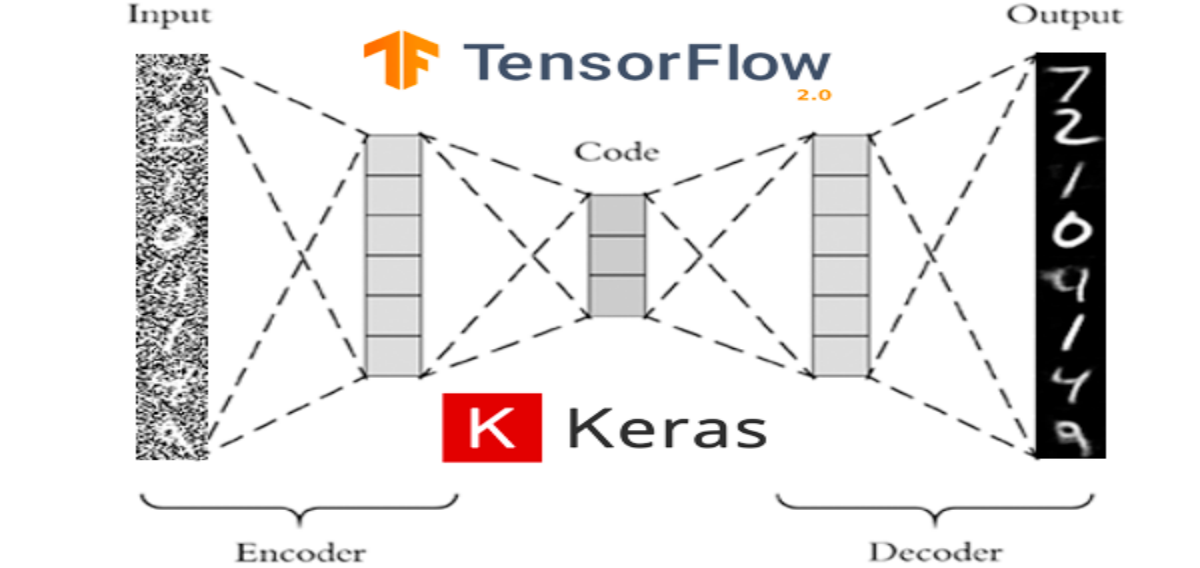

### Compresión de imágenes

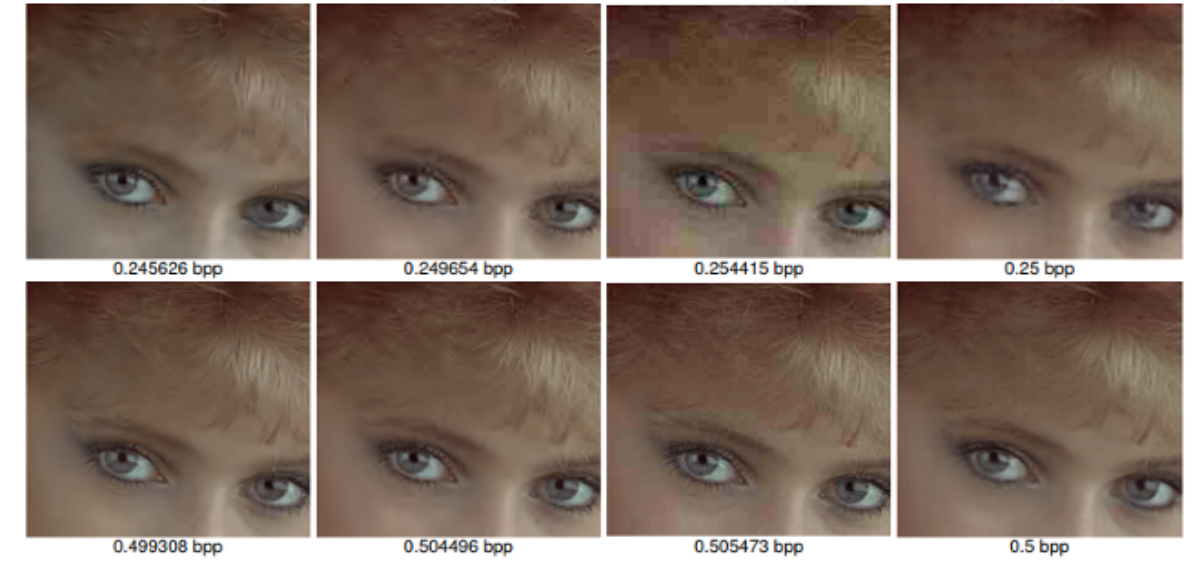

### Arte

![Texto](https://hackernoon.com/hn-images/1*XlmpgZMO_0ur0vNLIDb5fQ.jpeg)


### Reescalamiento

![Text](https://www.dpreview.com/files/p/articles/2842585992/maxplanck3.jpeg)

### Transformaciones de dominio

![Text](https://junyanz.github.io/CycleGAN/images/objects.jpg)

# Referencias 



1.   Canziani, A., Paszke, A., & Culurciello, E. (2016). An analysis of deep neural network models for practical applications. arXiv preprint arXiv:1605.07678.

2.   https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

3.   https://towardsdatascience.com/gan-papers-to-read-in-2020-2c708af5c0a4

4.   https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

5. https://paperswithcode.com/sota/image-classification-on-imagenet


